<a href="https://colab.research.google.com/github/lucevito/image/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
def printPlotLoss(history, d):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    #plt.savefig("plotLoss" + str(d) + ".png")
    plt.show()
    plt.close()

def printPlotAccuracy(history, d):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    #plt.savefig("plotAccuracy" + str(d) + ".png")
    plt.show()
    plt.close()

In [3]:
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

train_images_path = 'Immagini_satellitari/Train/images'
train_masks_path = 'Immagini_satellitari/Train/masks'
train_images_files = glob.glob(train_images_path + '/*.npy')
train_masks_files = glob.glob(train_masks_path + '/*.npy')
test_images_path = 'Immagini_satellitari/Test/images'
test_masks_path = 'Immagini_satellitari/Test/masks'
test_images_files = glob.glob(test_images_path + '/*.npy')
test_masks_files = glob.glob(test_masks_path + '/*.npy')

x_train = np.array([np.load(file) for file in train_images_files])
y_train = np.array([np.load(file) for file in train_masks_files])
x_test = np.array([np.load(file) for file in test_images_files])
y_test = np.array([np.load(file) for file in test_masks_files])

print('x_train :')
print(x_train.shape)

print('y_train :')
print(y_train.shape)

print('x_test :')
print(x_test.shape)

print('y_test :')
print(y_test.shape)

x_train :
(654, 32, 32, 10)
y_train :
(654, 32, 32)
x_test :
(161, 32, 32, 10)
y_test :
(161, 32, 32)


In [4]:
print("RESHAPE : \n")
print('x_train :')
x_train = x_train.reshape(654 * 32 * 32, 10)
print(x_train.shape)

print('y_train :')
y_train = y_train.reshape(654 * 32 * 32, 1)
print(y_train.shape)

print('x_test :')
x_test = x_test.reshape(161 * 32 * 32, 10)
print(x_test.shape)

print('y_test :')
y_test = y_test.reshape(161 * 32 * 32, 1)
print(y_test.shape)

RESHAPE : 

x_train :
(669696, 10)
y_train :
(669696, 1)
x_test :
(164864, 10)
y_test :
(164864, 1)


In [5]:
#poiche avevo questo avviso uso ravel()
#<ipython-input-5-408a8381cb1e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected.
#Please change the shape of y to (n_samples,), for example using ravel().
y_train = np.ravel(y_train)
print(y_train.shape)

(669696,)


In [6]:
print("Max value before preprocessing:" + str(np.amax(x_train)))
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
test_X=scaler.transform(x_test)
print("Max value after preprocessing:" + str(np.amax(x_train)))
print("Shape of train X: " + str(x_train.shape))
print("Shape of train Y: " + str(y_train.shape))
print("Shape of test X: " + str(x_test.shape))
print("Shape of test Y: " + str(y_test.shape))

Max value before preprocessing:255
Max value after preprocessing:1.0
Shape of train X: (669696, 10)
Shape of train Y: (669696,)
Shape of test X: (164864, 10)
Shape of test Y: (164864, 1)


In [7]:
import tensorflow
from keras.layers import Input, Dense
from keras import optimizers
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import callbacks
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model


def MLP_architecture(train_X):
    n_col = train_X.shape[1]
    input = Input(shape=(n_col,))

    hidden1 = Dense(128, activation='relu',
                    kernel_initializer='glorot_uniform',
                    name='l1')(input)
    hidden2= Dense(64, activation='relu',
                    kernel_initializer='glorot_uniform',
                    name='l2')(hidden1)

    hidden3 = Dense(32, activation='relu',
               kernel_initializer='glorot_uniform',
               name='l3')(hidden2)
    output=Dense(2,activation='softmax')(hidden3)
    model=Model(inputs=input, outputs=output)
    model.summary()
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.0001)) #change this
    return model


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 l1 (Dense)                  (None, 128)               1408      
                                                                 
 l2 (Dense)                  (None, 64)                8256      
                                                                 
 l3 (Dense)                  (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 11,810
Trainable params: 11,810
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
16743/16743 - 61s - loss: 0.1533 - accuracy: 0.9648 - val_loss: 0.1522 - val_accuracy: 0.9649 - 61s/epoch - 4ms/step
Epoch 2/150
16743/16743 - 55s - loss: 0.1523 - accuracy: 0.9649 - val_loss: 0.1523 - val_accuracy: 0.9649 - 55s/epoch - 3ms/step
Epoch 3/150
16743/16743 - 58s - loss: 0.1519 - accuracy: 0.9649 - val_loss: 0.1520 - val_accuracy: 0.9649 - 58s/epoch - 3ms/step
Epoch 4/150
16743/16743 - 55s - loss: 0.1515 - accuracy: 0.9649 - val_loss: 0.1543 - val_accuracy: 0.9649 - 55s/epoch - 3ms/step
Epoch 5/150
16743/16743 - 55s - loss: 0.1511 - accuracy: 0.9649 - val_loss: 0.1511 - val_accuracy: 0.9649 - 55s/epoch - 3ms/step
Epoch 6/150
16743/16743 - 55s - loss: 0.1506 - accuracy: 0.9649 - val_loss: 0.1501 - val_accuracy: 0.9649 - 55s/epoch - 3ms/step
Epoch 7/150
16743/16743 - 57s - loss: 0.1504 - accuracy: 0.9649 - val_loss: 0.1507 - val_accuracy: 0.9649 - 57s/epoch - 3ms/step
Epoch 8/150
16743/16743 - 58s - loss: 0.1502 - accuracy: 0.9649 - val_loss: 0.1496 - val_accuracy

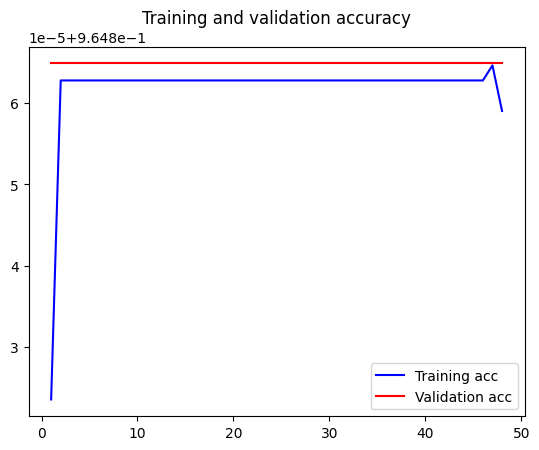

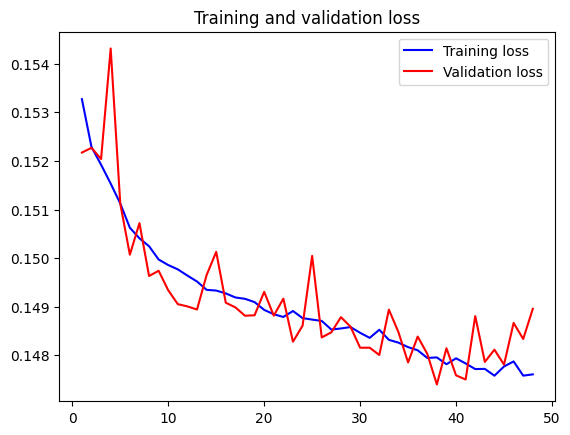

In [8]:
from sklearn.model_selection import train_test_split
from keras import callbacks
from keras.utils import np_utils
import matplotlib.pyplot as plt

model=MLP_architecture(x_train)
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True), ]

XTraining, XValidation, YTraining, YValidation = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2)
YTraining = np_utils.to_categorical(YTraining, 2)
YValidation = np_utils.to_categorical(YValidation, 2)
#ho incremento dall'originale 30 epoch a 150
history = model.fit(XTraining, YTraining, batch_size=32, epochs=150, verbose=2, callbacks=callbacks_list
              , shuffle= True , validation_data=(XValidation, YValidation))

printPlotAccuracy(history, 'MLP')
printPlotLoss(history, 'MLP')

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
y_predicted = model.predict(x_test, verbose=0, use_multiprocessing=True, workers=12)
y_predicted = np.argmax(y_predicted, axis=1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted))
print("CLassification test: ")
print(classification_report(y_test,y_predicted))

y_predicted = model.predict(x_train, verbose=0, use_multiprocessing=True, workers=12)
y_predicted = np.argmax(y_predicted, axis=1)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_predicted))
print("CLassification train: ")
print(classification_report(y_train, y_predicted))
model.save("MLP.h5")


Confusion Matrix:
 [[162100      0]
 [  2764      0]]
CLassification test: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    162100
           1       0.00      0.00      0.00      2764

    accuracy                           0.98    164864
   macro avg       0.49      0.50      0.50    164864
weighted avg       0.97      0.98      0.97    164864



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[646165      0]
 [ 23531      0]]
CLassification train: 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    646165
           1       0.00      0.00      0.00     23531

    accuracy                           0.96    669696
   macro avg       0.48      0.50      0.49    669696
weighted avg       0.93      0.96      0.95    669696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
